<a href="https://colab.research.google.com/github/SamuelChrisna/CRUD_Webpro_Laravel/blob/master/Sidang__Skripsi_RF_RSCV_SMOTE_after_split_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Example of reading a CSV file from Google Drive
import pandas as pd

# Replace 'your_file.csv' with the actual file name and path
file_path = '/content/drive/My Drive/upload/dataset/diabetes_data_upload_uci.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Unmount Google Drive (optional)
drive.flush_and_unmount()

Mounted at /content/drive
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0             

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Check the data types of the columns and if there is any null value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# **Pre-Processing**

In [ ]:
feature_df = df.columns
for i in feature_df:
    print(f" value unik fitur `{i}` berjumlah : ", df[i].nunique())
    print(" ")
    print(df[i].unique())
    print(" ")
    print("======================================================================")

 value unik fitur `Age` berjumlah :  51
 
[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
 
 value unik fitur `Gender` berjumlah :  2
 
['Male' 'Female']
 
 value unik fitur `Polyuria` berjumlah :  2
 
['No' 'Yes']
 
 value unik fitur `Polydipsia` berjumlah :  2
 
['Yes' 'No']
 
 value unik fitur `sudden weight loss` berjumlah :  2
 
['No' 'Yes']
 
 value unik fitur `weakness` berjumlah :  2
 
['Yes' 'No']
 
 value unik fitur `Polyphagia` berjumlah :  2
 
['No' 'Yes']
 
 value unik fitur `Genital thrush` berjumlah :  2
 
['No' 'Yes']
 
 value unik fitur `visual blurring` berjumlah :  2
 
['No' 'Yes']
 
 value unik fitur `Itching` berjumlah :  2
 
['Yes' 'No']
 
 value unik fitur `Irritability` berjumlah :  2
 
['No' 'Yes']
 
 value unik fitur `delayed healing` berjumlah :  2
 
['Yes' 'No']
 
 value unik fitur `partial paresis` berjumlah :  2
 
['No' 'Yes']
 
 value unik fitur `m

In [ ]:
print(df.isin(["-", "?", "N/A", " "]).sum())


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


**mengubah outcome menjadi numerik**

In [ ]:
# Changing Postive to 1 and Negative to 0
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

,class
0,1
1,1
2,1
3,1
4,1


**encoding fitur**

In [ ]:
# Storing Features
objectList = df.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [ ]:
import pandas as pd

# To display the first and last 5 rows with better formatting
print("\nFirst and Last 5 Rows of the Data:")
combined_rows = pd.concat([df.head(), df.tail()])

# Add a visual separator between head and tail rows
separator_index = len(df.head())
combined_rows_list = combined_rows.reset_index().to_dict('records')
combined_rows_list.insert(separator_index, {col: '...' for col in combined_rows.reset_index().columns})

# Create a new DataFrame with the separator
combined_df = pd.DataFrame(combined_rows_list)

# Use to_string() for better formatting like X.head(5)
print(combined_df.to_string())


First and Last 5 Rows of the Data:
   index  Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia Genital thrush visual blurring Itching Irritability delayed healing partial paresis muscle stiffness Alopecia Obesity class
0      0   40    Male       No        Yes                 No      Yes         No             No              No     Yes           No             Yes              No              Yes      Yes     Yes     1
1      1   58    Male       No         No                 No      Yes         No             No             Yes      No           No              No             Yes               No      Yes      No     1
2      2   41    Male      Yes         No                 No      Yes        Yes             No              No     Yes           No             Yes              No              Yes      Yes      No     1
3      3   45    Male       No         No                Yes      Yes        Yes            Yes              No     Yes           No            

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'objectList' and 'df' are already defined in your environment

le = LabelEncoder()

for feature in objectList:
    df[feature] = le.fit_transform(df[feature].astype(str))

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [ ]:
import pandas as pd

# To display the first and last 5 rows with better formatting
print("\nFirst and Last 5 Rows of the Data:")
combined_rows = pd.concat([df.head(), df.tail()])

# Add a visual separator between head and tail rows
separator_index = len(df.head())
combined_rows_list = combined_rows.reset_index().to_dict('records')
combined_rows_list.insert(separator_index, {col: '...' for col in combined_rows.reset_index().columns})

# Create a new DataFrame with the separator
combined_df = pd.DataFrame(combined_rows_list)

# Use to_string() for better formatting like X.head(5)
print(combined_df.to_string())


First and Last 5 Rows of the Data:
   index  Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia Genital thrush visual blurring Itching Irritability delayed healing partial paresis muscle stiffness Alopecia Obesity class
0      0   40      1        0          1                  0        1          0              0               0       1            0               1               0                1        1       1     1
1      1   58      1        0          0                  0        1          0              0               1       0            0               0               1                0        1       0     1
2      2   41      1        1          0                  0        1          1              0               0       1            0               1               0                1        1       0     1
3      3   45      1        0          0                  1        1          1              1               0       1            0               1 

In [ ]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[]

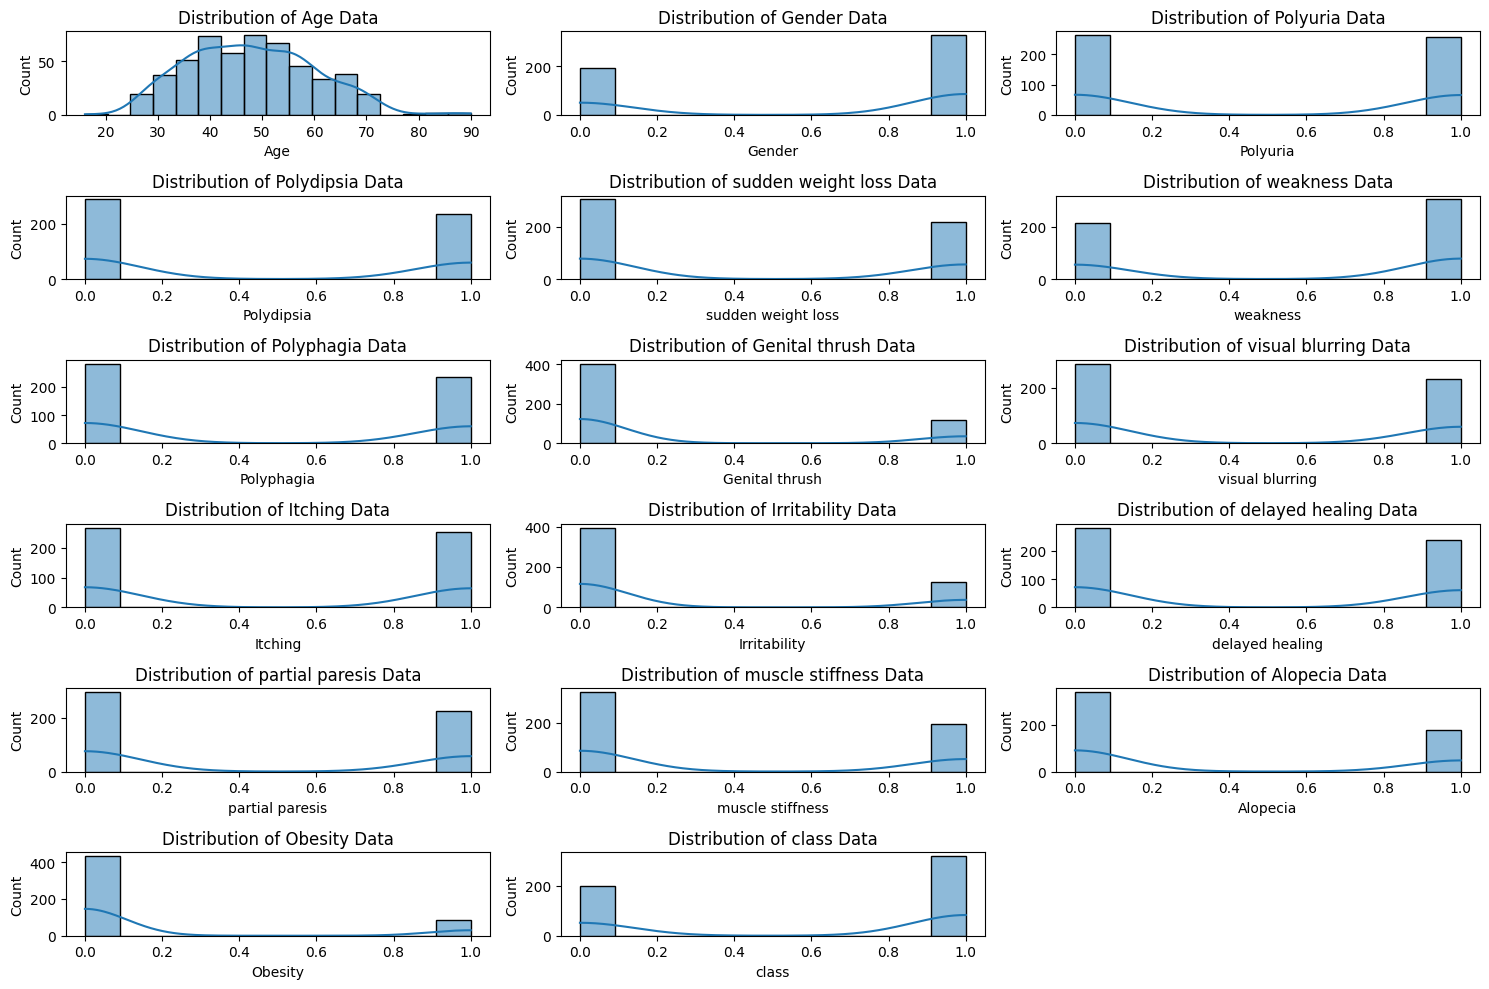

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
num_cols = len(df.columns)
num_rows = (num_cols - 1) // 3 + 1

for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, 3 if num_cols >= 3 else num_cols, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()

plt.plot()

**mengatasi outlier**

In [ ]:
def detect_outliers_iqr(df, Age):
    data = df[Age]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Example usage:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to analyze
outliers = detect_outliers_iqr(df, 'Age')
print("Number of outliers:", outliers.sum())

Number of outliers: 4


In [ ]:
numCol = ['Age']

In [ ]:
for feature in df[numCol]:
    fig = px.box(df[numCol], y=feature, title=f'Boxplot dari fitur {feature}')
    fig.update_layout(height=500, width=500)
    fig.show()

In [ ]:
def outlierDEL(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3-q1
    lowBound = q1-1.5*IQR
    upBound = q3+1.5*IQR

    df[column] = df[column].apply(lambda x: lowBound if x<lowBound else (upBound if x> upBound else x))

In [ ]:
outliersCOL = ['Age']
for col in outliersCOL:
    outlierDEL(col)

In [ ]:
for feature in df[outliersCOL]:
    fig = px.box(df[numCol], y=feature, title=f'Boxplot dari fitur {feature}')
    fig.update_layout(height=500, width=500)
    fig.show()

In [ ]:
# Define predictors and target
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
# Checking the distribution of classes in the target variable
class_distribution = y.value_counts()
print(class_distribution)

class
1    320
0    200
Name: count, dtype: int64


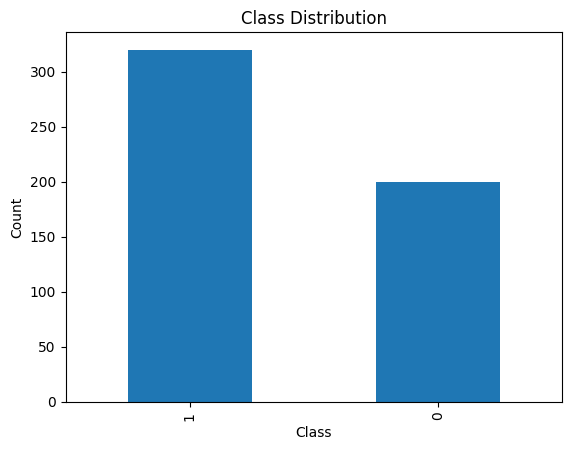

In [ ]:
import matplotlib.pyplot as plt

# Plotting the class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**Scalling Fitur**

In [ ]:
X[['Age']].head(5)

,Age
0,40.0
1,58.0
2,41.0
3,45.0
4,60.0


In [ ]:
X[['Age']].tail(5)

,Age
515,39.0
516,48.0
517,58.0
518,32.0
519,42.0


In [ ]:
minmax = MinMaxScaler()
X[['Age']] = minmax.fit_transform(X[['Age']])


In [ ]:
X[['Age']].head(5)

,Age
0,0.352941
1,0.617647
2,0.367647
3,0.426471
4,0.647059


In [ ]:
X[['Age']].tail(5)

,Age
515,0.338235
516,0.470588
517,0.617647
518,0.235294
519,0.382353


# **Data Split**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(390, 16) (390,)
(130, 16) (130,)


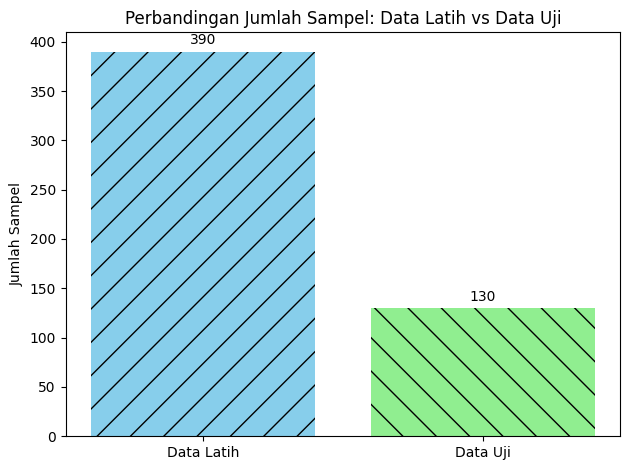

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data jumlah sampel
train_samples = len(X_train)
test_samples = len(X_test)

# Membuat DataFrame untuk perbandingan
df_split = pd.DataFrame({
    'Dataset': ['Data Latih', 'Data Uji'],
    'Jumlah Sampel': [train_samples, test_samples]
})

# Plot dengan arsiran
fig, ax = plt.subplots()
bars = ax.bar(df_split['Dataset'], df_split['Jumlah Sampel'], color=['skyblue', 'lightgreen'])

# Tambahkan arsiran pada bar
hatches = ['/', '\\']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Tambahkan label
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Jarak teks ke atas bar
                textcoords="offset points",
                ha='center', va='bottom')

# Atur tampilan
ax.set_title('Perbandingan Jumlah Sampel: Data Latih vs Data Uji')
ax.set_ylabel('Jumlah Sampel')
plt.tight_layout()
plt.show()

In [ ]:
print("X_train (First 4 rows):")
print(X_train.head(4))
print("\nX_train (Last 4 rows):")
print(X_train.tail(4))

print("\nX_test (First 4 rows):")
print(X_test.head(4))
print("\nX_test (Last 4 rows):")
print(X_test.tail(4))

print("\ny_train (First 4 rows):")
print(y_train.head(4))
print("\ny_train (Last 4 rows):")
print(y_train.tail(4))

print("\ny_test (First 4 rows):")
print(y_test.head(4))
print("\ny_test (Last 4 rows):")
print(y_test.tail(4))

X_train (First 4 rows):
          Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
190  0.617647       1         0           1                   1         1   
494  0.294118       1         0           0                   0         0   
103  0.823529       1         1           0                   1         1   
75   0.573529       0         1           1                   1         1   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
190           1               0                1        1             0   
494           0               0                0        0             0   
103           1               0                0        0             1   
75            0               0                1        0             0   

     delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  
190                0                1                 0         1        1  
494                0                0                 0     

# **SMOTE**

In [ ]:
# Checking the distribution of classes in the target variable
class_distribution = y_train.value_counts()
print(class_distribution)

class
1    240
0    150
Name: count, dtype: int64


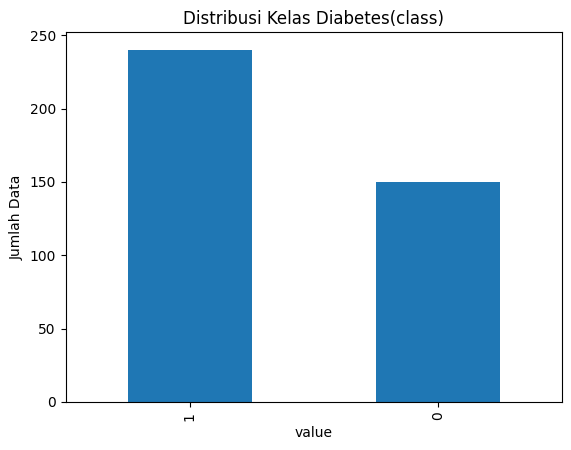

In [ ]:
# Plotting the class distribution
class_distribution.plot(kind='bar')
plt.title('Distribusi Kelas Diabetes(class)')
plt.xlabel('value')
plt.ylabel('Jumlah Data')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np

# Assuming X_train, y_train are already defined
# We need to identify which samples are synthetic (created by SMOTE)

# First, let's keep track of the original indices
original_indices = set(range(len(y_train)))

# Initialize SMOTE with the same parameters
smote = SMOTE(k_neighbors=5, random_state=32)

# Perform SMOTE oversampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distributions to understand what was generated
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))



Before SMOTE: Counter({1: 240, 0: 150})
After SMOTE: Counter({1: 240, 0: 240})


In [ ]:
class_distribution = y_train_resampled.value_counts()
print(class_distribution)

class
1    240
0    240
Name: count, dtype: int64


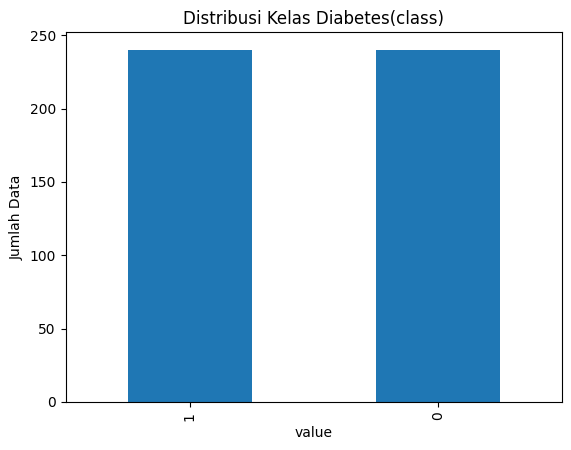

In [ ]:
class_distribution.plot(kind='bar')
plt.title('Distribusi Kelas Diabetes(class)')
plt.xlabel('value')
plt.ylabel('Jumlah Data')
plt.show()

# synthetic data print

In [ ]:
# Extract only the synthetic data
X_synthetic = X_train_resampled[len(y_train):]
y_synthetic = y_train_resampled[len(y_train):]

# Create a DataFrame with the synthetic data
# Use the original feature names instead of numeric indices
# If X_train is already a DataFrame, use its column names
if isinstance(X_train, pd.DataFrame):
    synthetic_df = pd.DataFrame(X_synthetic, columns=X_train.columns)
else:
    # If X_train is a numpy array, create generic feature names
    feature_names = [f'Feature_{i}' for i in range(X_synthetic.shape[1])]
    synthetic_df = pd.DataFrame(X_synthetic, columns=feature_names)

# Add class and sample_type columns
synthetic_df['class'] = y_synthetic
synthetic_df['sample_type'] = 'Synthetic'

# Display the synthetic data table
print("\nSynthetic Data Generated by SMOTE:")
print(synthetic_df.to_string())

# For a cleaner table display, limit columns if there are many
if synthetic_df.shape[1] > 10:
    # Display first few feature columns plus the class column
    # Use actual column names instead of numeric indices
    feature_cols = synthetic_df.columns[:-2]  # All columns except class and sample_type
    display_cols = list(feature_cols[:5]) + ['class', 'sample_type']
    print("\nSynthetic Data (First 5 Features Only):")
    print(synthetic_df[display_cols].head(10).to_string())
    print(f"\n[{len(synthetic_df)} synthetic samples generated in total]")
else:
    # Display the full table if not too many columns
    print(synthetic_df.head(10).to_string())
    print(f"\n[{len(synthetic_df)} synthetic samples generated in total]")


Synthetic Data Generated by SMOTE:
          Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  Genital thrush  visual blurring  Itching  Irritability  delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  class sample_type
390  0.678728       1         0           0                   0         1           1               0                1        1             0                1                0                 1         1        0      0   Synthetic
391  0.205882       1         0           0                   0         0           0               0                0        0             0                0                0                 0         0        0      0   Synthetic
392  0.602941       1         0           0                   0         0           1               0                1        0             0                0                0                 1         0        0      0   Synthetic
393  0.602941       1         0     

# **Model Defining**

In [ ]:
param_distRF = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'bootstrap': [True, False]
}




# **Model Eval**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, accuracy_score,
                             precision_score, recall_score, f1_score,
                             confusion_matrix, log_loss)
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Daftar hasil evaluasi
md_acc = []

# Fungsi evaluasi model
def modelEvaSmote(mod, mdNM, best_params):
    y_pred = mod.predict(X_test)
    y_proba_test = mod.predict_proba(X_test)
    y_proba_train = mod.predict_proba(X_train_resampled)
    cfm = confusion_matrix(y_test, y_pred)

    tr_acc = mod.score(X_train_resampled, y_train_resampled)
    ts_acc = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Log loss (training dan test)
    train_loss = log_loss(y_train_resampled, y_proba_train)
    test_loss = log_loss(y_test, y_proba_test)

    print(f"{mdNM} Model:")
    print("Best Parameters:", best_params)
    print("Testing Accuracy :", ts_acc)
    print("Training Loss (Log Loss):", train_loss)
    print("Test Loss (Log Loss):", test_loss)
    print("Precision (positive class):", precision)
    print("Recall (positive class):", recall)
    print("F1-Score (positive class):", f1)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

     # Print Confusion Matrix as Table
    print("\nConfusion Matrix (Table):")
    cm_df = pd.DataFrame(cfm, index=['Actual: No', 'Actual: Yes'],
                              columns=['Pred: No', 'Pred: Yes'])
    print(cm_df)

    # Visualisasi heatmap confusion matrix
    sns.heatmap(cfm, annot=True, fmt="d", linewidths=.5, cmap='BuPu')
    plt.title(f"{mdNM} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    md_acc.append({
        'model': mdNM,
        'testing_accuracy': round(ts_acc * 100, 2),
        'training_loss': round(train_loss, 4),
        'test_loss': round(test_loss, 4),
        'precision': round(precision * 100, 2),
        'recall': round(recall * 100, 2),
        'f1_score': round(f1 * 100, 2),
        'best_params': str(best_params)
    })

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Random Forest SMOTE RandomSearchCV Model:
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Testing Accuracy : 0.9846153846153847
Training Loss (Log Loss): 0.003291068037374885
Test Loss (Log Loss): 0.0514482918485743
Precision (positive class): 1.0
Recall (positive class): 0.975
F1-Score (positive class): 0.9873417721518988

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.97      0.99        80

    accuracy                           0.98       130
   macro avg       0.98      0.99      0.98       130
weighted avg       0.99      0.98      0.98       130


Confusion Matrix (Table):
             Pred: No  Pred: Yes
Actual: No         50          0
Actual: Yes         2         78


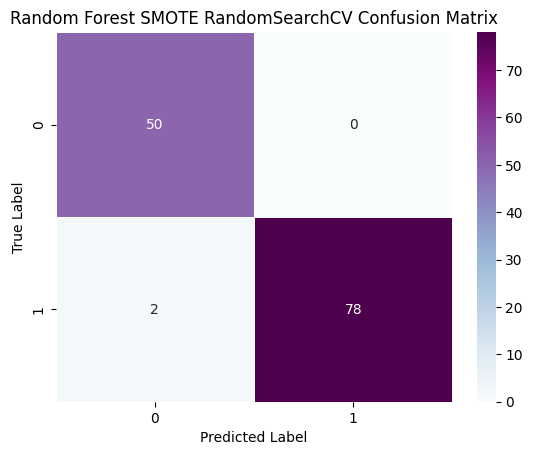


Hasil Evaluasi Model:
╒════╤════════════════════════════════════╤════════════════════╤═════════════════╤═════════════╤═════════════╤══════════╤════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │ model                              │   testing_accuracy │   training_loss │   test_loss │   precision │   recall │   f1_score │ best_params                                                                                                                       │
╞════╪════════════════════════════════════╪════════════════════╪═════════════════╪═════════════╪═════════════╪══════════╪════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│  0 │ Random Forest SMOTE RandomSearchCV │              98.46 │          0.0033 │      0.0514 │         100 │     97.5 │      98.73 │ {'n_estimators': 400, 'min_samples_split'

In [ ]:


# Random Forest Model dan RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=0)
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_distRF, n_iter=100, cv=10, verbose=2, random_state=32, n_jobs=-1)

# Training model
rf_random.fit(X_train_resampled, y_train_resampled)
best_rf_model = rf_random.best_estimator_
best_params = rf_random.best_params_

# Evaluasi model
modelEvaSmote(best_rf_model, 'Random Forest SMOTE RandomSearchCV', best_params)

# Membuat DataFrame hasil evaluasi
dfMD_acc = pd.DataFrame(md_acc)

# Menampilkan hasil evaluasi dalam bentuk tabel
print("\nHasil Evaluasi Model:")
print(tabulate(dfMD_acc, headers='keys', tablefmt='fancy_grid'))

# Menyimpan hasil evaluasi ke file CSV
dfMD_acc.to_csv('model_evaluation_results.csv', index=False)